# Pytorch Workflow

## Linear Regression

In [82]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Create data
weight = 0.3
bias = 0.7
X = torch.arange(start=0., end=1., step=0.02).unsqueeze(1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.7000],
         [0.7060],
         [0.7120],
         [0.7180],
         [0.7240],
         [0.7300],
         [0.7360],
         [0.7420],
         [0.7480],
         [0.7540]]))

In [83]:
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

40 10
40 10


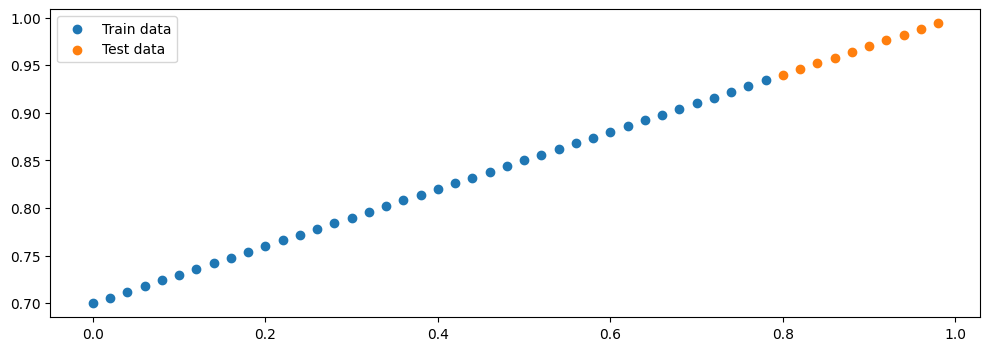

In [84]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(12, 4))
    plt.scatter(train_data, train_labels, label='Train data')
    plt.scatter(test_data, test_labels, label='Test data')
    if predictions is not None:
        plt.scatter(test_data, predictions, label='Predictions', color='r')
    plt.legend()
    plt.show()


plot_predictions()

In [110]:

# Create linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):                 # Constructor
        super().__init__()              # calls the init of nn.Module
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """ Forward pass of the model"""
        return self.weights * x + self.bias
    
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward (self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

<bound method Module.parameters of LinearRegressionModelV2(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)>
OrderedDict([('linear.weight', tensor([[0.7645]])), ('linear.bias', tensor([0.8300]))])
epoch 0, loss 0.1083336473
epoch 50, loss 0.0026469026
epoch 100, loss 0.0010509765
epoch 150, loss 0.0004172993
epoch 200, loss 0.0001656930
epoch 250, loss 0.0000657900
epoch 300, loss 0.0000261224
epoch 350, loss 0.0000103721
epoch 400, loss 0.0000041183
epoch 450, loss 0.0000016352


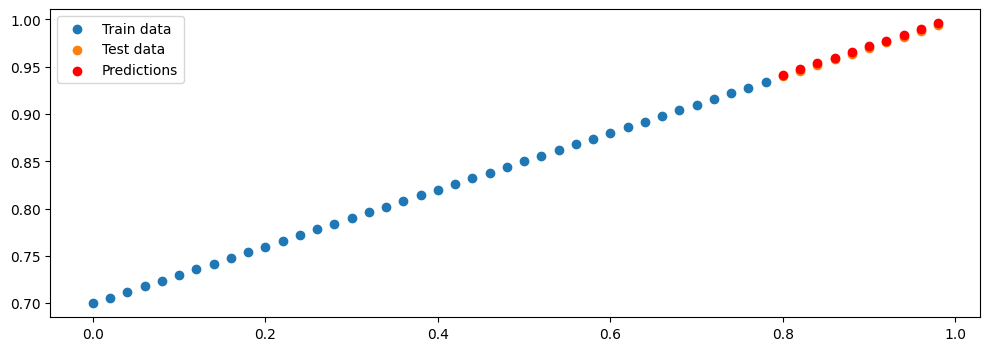

OrderedDict([('linear.weight', tensor([[0.3035]])), ('linear.bias', tensor([0.6986]))])


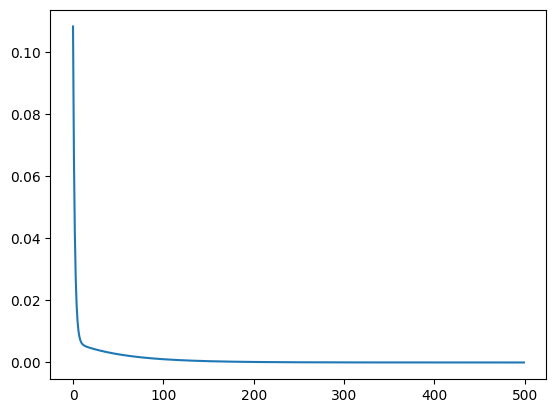

In [120]:
# Hyperparameters
learning_rate = 0.1
epochs = 500

torch.manual_seed(42)   # Set seed for reproducibility
model = LinearRegressionModelV2()
print(model.parameters)
print(model.state_dict())

history = {
    'loss': [], 
    'weights': [], 
    'bias': []
}

# Optimizer and loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_predicted = model(X_train)

    # Computs Loss
    l = loss(y_predicted, y_train)
    history["loss"].append(l.item())

    # Backward pass
    l.backward()  # dl/dw

    # Update parameters
    optimizer.step()

    # Reset gradients to zero
    optimizer.zero_grad()

    if epoch % (epochs / 10) == 0:
        
        print(f'epoch {epoch}, loss {l.item():.10f}')

with torch.inference_mode(): # No need to track the gradients
    y_pred = model(X_test)
    plot_predictions(predictions=y_pred)

print(model.state_dict())
plt.plot(range(len(history["loss"])), history["loss"])


In [87]:
class FCNModel(nn.Module):
    def __init__(self):                 # Constructor
        super().__init__()              # calls the init of nn.Module
        
        # Define layers
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """ Forward pass of the model"""
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        return self.fc3(x)

epoch 0, loss 0.8686
epoch 100, loss 0.0562
epoch 200, loss 0.0411
epoch 300, loss 0.0398
epoch 400, loss 0.0335
epoch 500, loss 0.0362
epoch 600, loss 0.0300
epoch 700, loss 0.0296
epoch 800, loss 0.0258
epoch 900, loss 0.0252


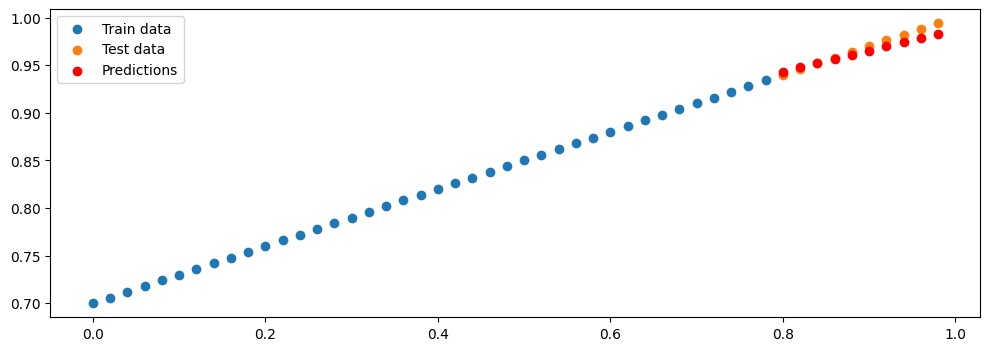

FCNModel(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)


In [96]:

model = FCNModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss = nn.L1Loss()

epochs = 1000

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_predicted = model(X_train)

    # Computs Loss
    l = loss(y_predicted, y_train)

    # Backward pass
    l.backward()  # dl/dw

    # Update parameters
    optimizer.step()

    # Reset gradients to zero
    optimizer.zero_grad()

    if epoch % (epochs / 10) == 0:
        print(f'epoch {epoch}, loss {l.item():.4f}')
        
    # Clear cache
    torch.cuda.empty_cache()
        
with torch.inference_mode(): # No need to track the gradients
    y_pred = model(X_test)
    plot_predictions(predictions=y_pred)
    
print(model.eval())
    